**1.Business Understanding**

ABC is a company in the telecommunication industry. ABC company provides services such as mobile phone plans, landline services, internet connectivity, and more. ABC often collect data on customer tenure, usage patterns (e.g., call and data usage), equipment ownership (e.g., phones, routers), billing preferences, income, age, and regional factors to predict and address customer churn.
The goal will be:
* Examine the curent overall churnrate for comapny
* Predict churn to help business make decisions or make informed choices.
* Develop strategies and initiatives to improve customer retention.

Business Question:
"What shared traits might we observe among the customers who we recently lost to our competitors?



**2. Data Understanding**

This data set contains information about Customer churn at ABC, also known as customer attrition or customer turnover. The dataset contains various attributes or features related to customers and their behavior, and it is designed for the purpose of analyzing and predicting customer churn. We will use this file to predict the churn and visualize decision processes.


**VARIABLE DESCRIPTIONS:**

cust_id: Customer ID or identifier.

region: Customer's region or location.

tenure: Number of months the customer has been with the company.

age: Customer's age.

marital: Marital status (e.g., "Y" for Yes, "N" for No).

address: Customer's address information.

income: Customer's income.

ed: Education level or category.

employ: Number of months employed.

retire: Whether the customer is retired ("Y" for Yes, "N" for No).

gender: Customer's gender.

reside: Number of people residing in the household.

tollfree: Whether the customer has a toll-free service ("Y" for Yes, "N" for No).

equip: Equipment ownership ("Y" for Yes, "N" for No).

callcard: Whether the customer has a calling card ("Y" for Yes, "N" for No).

wireless: Whether the customer has a wireless service ("Y" for Yes, "N" for No).

longmon: Longest call in minutes.

tollmon: Toll usage in dollars.

equipmon: Equipment usage in dollars.

cardmon: Calling card usage in dollars.

wiremon: Wireless usage in dollars.

longten: Total minutes of longest call.

tollten: Total toll usage in dollars.

equipten: Total equipment usage in dollars.

cardten: Total calling card usage in dollars.

wireten: Total wireless usage in dollars.

multline: Whether the customer has multiple lines ("Y" for Yes, "N" for No).

voice: Whether the customer has voice services ("Y" for Yes, "N" for No).

pager: Whether the customer has a pager service ("Y" for Yes, "N" for No).

internet: Whether the customer has internet service ("Y" for Yes, "N" for No).

callid: Whether the customer has caller ID ("Y" for Yes, "N" for No).

callwait: Whether the customer has call waiting ("Y" for Yes, "N" for No).

forward: Whether the customer has call forwarding ("Y" for Yes, "N" for No).

confer: Whether the customer has conferencing services ("Y" for Yes, "N" for
No).

ebill: Whether the customer uses electronic billing ("Y" for Yes, "N" for No).

loglong: Logarithm of the longest call in minutes.

lninc: Logarithm of income.

custcat: Customer category or type.

churn: Churn status ("Y" for Yes, indicating a customer who left or canceled, "N" for No, indicating a customer who stayed).



Target Variable: **churn**

In [831]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [832]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [833]:
# Read data
customerchurn = pd.read_csv('/content/drive/MyDrive/IS470_data/CutomerChurnData.csv')
# View all columns, set the max columns to none
pd.set_option('display.max_columns', None)
# customerchurn is the data frame
customerchurn



,cust_id,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,C00124,R2,13,44,Y,9,64,E4,5,N,N,2,N,N,Y,N,3.70,0.00,0.0,7.50,0.0,37.45,0.00,0.00,110,0.0,N,N,N,N,N,N,Y,N,N,1.308,4.159,C1,Y
1,C00125,R3,68,52,Y,24,116,E1,29,N,Y,2,Y,N,Y,N,18.15,18.00,0.0,30.25,0.0,1300.60,1247.20,0.00,2150,0.0,N,N,N,N,Y,Y,N,Y,N,2.899,4.754,C3,N
2,C00126,R2,23,30,Y,9,30,E1,2,N,N,4,N,N,N,N,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.00,0,0.0,N,N,N,N,Y,N,Y,Y,N,1.841,3.401,C3,N
3,C00127,R3,45,22,Y,2,19,E2,4,N,Y,5,N,N,Y,N,10.90,0.00,0.0,8.75,0.0,504.50,0.00,0.00,415,0.0,Y,N,N,Y,N,Y,N,N,Y,2.389,2.944,C2,Y
4,C00128,R3,45,59,Y,7,166,E4,31,N,N,5,Y,N,Y,N,9.75,28.50,0.0,12.00,0.0,449.05,1240.15,0.00,505,0.0,Y,N,N,N,Y,Y,Y,Y,N,2.277,5.112,C3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C01119,R1,50,43,N,6,27,E3,4,N,N,1,Y,N,Y,N,15.00,45.25,0.0,52.75,0.0,817.85,2320.25,0.00,2645,0.0,N,N,N,N,Y,Y,Y,Y,N,2.708,3.296,C3,N
996,C01120,R1,34,52,Y,2,106,E2,19,N,N,2,Y,N,Y,N,4.95,19.00,0.0,13.50,0.0,153.50,649.35,0.00,430,0.0,N,N,N,Y,Y,N,Y,Y,N,1.599,4.663,C3,N
997,C01121,R1,15,46,Y,17,63,E5,1,N,N,2,Y,Y,N,Y,3.70,16.50,42.5,0.00,33.1,40.55,207.35,547.95,0,475.3,Y,Y,Y,Y,Y,N,Y,Y,Y,1.308,4.143,C4,Y
998,C01122,R1,7,34,N,2,22,E5,5,N,Y,1,N,Y,N,N,4.65,0.00,25.6,0.00,0.0,29.35,0.00,179.10,0,0.0,N,N,N,N,N,N,N,N,N,1.537,3.091,C1,N


This step includes upload dataset and import neccessay libararies for datanalysis.

In [834]:
# examine the number of rows and colummns
customerchurn.shape

(1000, 39)

Notice that the dataframe has 39 columns related to customer behavior. Each user is identified through a unique customer ID.

In [835]:
# Getting information about data types
customerchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cust_id   1000 non-null   object 
 1   region    1000 non-null   object 
 2   tenure    1000 non-null   int64  
 3   age       1000 non-null   int64  
 4   marital   1000 non-null   object 
 5   address   1000 non-null   int64  
 6   income    1000 non-null   int64  
 7   ed        1000 non-null   object 
 8   employ    1000 non-null   int64  
 9   retire    1000 non-null   object 
 10  gender    1000 non-null   object 
 11  reside    1000 non-null   int64  
 12  tollfree  1000 non-null   object 
 13  equip     1000 non-null   object 
 14  callcard  1000 non-null   object 
 15  wireless  1000 non-null   object 
 16  longmon   1000 non-null   float64
 17  tollmon   1000 non-null   float64
 18  equipmon  1000 non-null   float64
 19  cardmon   1000 non-null   float64
 20  wiremon   1000 non-null   float

There are 37 independent variables used to predict the target feature (churn). In this dataset, customer churn is defined as users who recently lost to other competitors.

In [836]:
customerchurn.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,1000.0,35.242000,21.295937,1.000,16.0000,34.500,53.0000,72.000
age,1000.0,41.552000,12.679435,18.000,32.0000,40.000,51.0000,77.000
address,1000.0,11.576000,10.132467,0.000,3.7500,9.000,18.0000,55.000
income,1000.0,71.906000,80.297826,9.000,28.0000,46.000,83.2500,732.000
employ,1000.0,10.790000,10.144990,0.000,3.0000,8.000,17.2500,47.000
reside,1000.0,2.316000,1.434644,1.000,1.0000,2.000,3.0000,7.000
longmon,1000.0,11.163600,9.540451,1.050,5.1500,8.500,13.8625,99.950
tollmon,1000.0,13.343500,17.414790,0.000,0.0000,0.000,24.2500,173.000
equipmon,1000.0,13.572200,18.850834,0.000,0.0000,0.000,30.7875,77.700
cardmon,1000.0,13.911500,14.404653,0.000,0.0000,12.125,19.5625,109.250


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'employ'}>,
        <Axes: title={'center': 'reside'}>,
        <Axes: title={'center': 'longmon'}>,
        <Axes: title={'center': 'tollmon'}>],
       [<Axes: title={'center': 'equipmon'}>,
        <Axes: title={'center': 'cardmon'}>,
        <Axes: title={'center': 'wiremon'}>,
        <Axes: title={'center': 'longten'}>],
       [<Axes: title={'center': 'tollten'}>,
        <Axes: title={'center': 'equipten'}>,
        <Axes: title={'center': 'cardten'}>,
        <Axes: title={'center': 'wireten'}>],
       [<Axes: title={'center': 'loglong'}>,
        <Axes: title={'center': 'lninc'}>, <Axes: >, <Axes: >]],
      dtype=object)

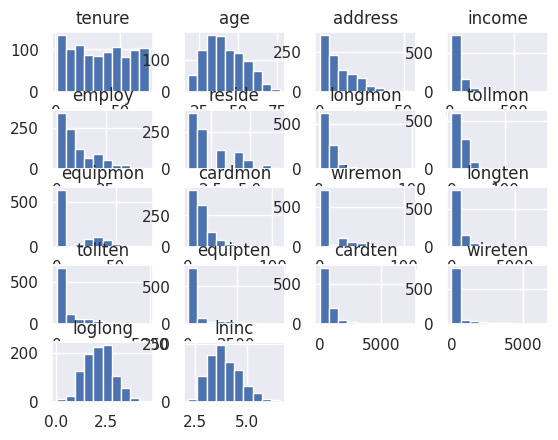

In [838]:
customerchurn.hist()

**3. Data preprocessing**

In [839]:
customerchurn.keys()

Index(['cust_id', 'region', 'tenure', 'age', 'marital', 'address', 'income',
       'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'equipten', 'cardten', 'wireten',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'ebill', 'loglong', 'lninc', 'custcat', 'churn'],
      dtype='object')

In [840]:
# Select the desired columns only
desired_columns = ['region','tenure', 'age', 'marital','income','ed','employ','retire','gender','reside','equip','tollmon','equipmon','cardmon','wiremon','multline','custcat','voice','pager','internet','churn']
customerchurn_desired = customerchurn [desired_columns]

Noticed that some of the colums is not making sense for anlyzing and are not really relevant to our prediction such as cust_id, loglong,.. My goal is to exclude all those irrelevant fields and  choose variables that most important to our model. And in the event that those fields are categorical (region, marital,...), I will use dummy coding later.

In [841]:
# Replacing 1 with Yes and 0 with No in the target column churn

customerchurn = customerchurn_desired.copy()
customerchurn.loc[:, 'churn'] = customerchurn['churn'].replace({0: 'N', 1: 'Y'})

For binary classification, numeric values like 0 and 1 are used to represent the two classes:

0 represents the class ( no churn)
1 represents the class (churn)

In [842]:
# Show the head rows of a data frame
customerchurn.head()

,region,tenure,age,marital,income,ed,employ,retire,gender,reside,equip,tollmon,equipmon,cardmon,wiremon,multline,custcat,voice,pager,internet,churn
0,R2,13,44,Y,64,E4,5,N,N,2,N,0.0,0.0,7.50,0.0,N,C1,N,N,N,Y
1,R3,68,52,Y,116,E1,29,N,Y,2,N,18.0,0.0,30.25,0.0,N,C3,N,N,N,N
2,R2,23,30,Y,30,E1,2,N,N,4,N,0.0,0.0,0.00,0.0,N,C3,N,N,N,N
3,R3,45,22,Y,19,E2,4,N,Y,5,N,0.0,0.0,8.75,0.0,Y,C2,N,N,Y,Y
4,R3,45,59,Y,166,E4,31,N,N,5,N,28.5,0.0,12.00,0.0,Y,C3,N,N,N,N


I need to look at the initial rows of data  for easier visualization. It helps identify the structure, column names, data types, and the overall format of dataset. Also, it helps dentifying missing values, anomalies, or outliers in the data.

In [843]:
# Examine missing values
customerchurn.isnull().sum()

region      0
tenure      0
age         0
marital     0
income      0
ed          0
employ      0
retire      0
gender      0
reside      0
equip       0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
multline    0
custcat     0
voice       0
pager       0
internet    0
churn       0
dtype: int64

This step of checking missing values is vital for data cleaning and preprocessing, as we need to decide how to handle missing values, remove or correct anomalies. According to the results, there is no missing values in the data set that need to be addressed.

In [844]:
len(customerchurn[customerchurn.duplicated()])

500

In [845]:
#Examinie variables types
customerchurn.dtypes

region       object
tenure        int64
age           int64
marital      object
income        int64
ed           object
employ        int64
retire       object
gender       object
reside        int64
equip        object
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
multline     object
custcat      object
voice        object
pager        object
internet     object
churn        object
dtype: object

Notice that the many variables have the data type “object,” when they should be a category column. We need to convert this column into a catgory .

In [846]:
# Change categorical variables to "category"
customerchurn['region'] = customerchurn['region'].astype('category')
customerchurn['marital'] = customerchurn['marital'].astype('category')
customerchurn['ed'] = customerchurn['ed'].astype('category')
customerchurn['retire'] = customerchurn['retire'].astype('category')
customerchurn['gender'] = customerchurn['gender'].astype('category')
customerchurn['equip'] = customerchurn['equip'].astype('category')
customerchurn['multline'] = customerchurn['multline'].astype('category')
customerchurn['custcat'] = customerchurn['custcat'].astype('category')
customerchurn['voice'] = customerchurn['voice'].astype('category')
customerchurn['pager'] = customerchurn['pager'].astype('category')
customerchurn['internet'] = customerchurn['internet'].astype('category')
customerchurn['churn'] = customerchurn['churn'].astype('category')

In [847]:
# Examine variable type
customerchurn.dtypes

region      category
tenure         int64
age            int64
marital     category
income         int64
ed          category
employ         int64
retire      category
gender      category
reside         int64
equip       category
tollmon      float64
equipmon     float64
cardmon      float64
wiremon      float64
multline    category
custcat     category
voice       category
pager       category
internet    category
churn       category
dtype: object

All varibles data types have been updated.

 Here I will split the dataset into Numeric and Catgory to facilitate the analysis. This gives us an idea of how our data looks like.

In [848]:
num_churn = customerchurn.select_dtypes(include=['number'])
cate_churn = customerchurn.select_dtypes(include=['category'])

In [849]:
# Display all numeric variables
customerchurn.select_dtypes(include=['number'])

,tenure,age,income,employ,reside,tollmon,equipmon,cardmon,wiremon
0,13,44,64,5,2,0.00,0.0,7.50,0.0
1,68,52,116,29,2,18.00,0.0,30.25,0.0
2,23,30,30,2,4,0.00,0.0,0.00,0.0
3,45,22,19,4,5,0.00,0.0,8.75,0.0
4,45,59,166,31,5,28.50,0.0,12.00,0.0
...,...,...,...,...,...,...,...,...,...
995,50,43,27,4,1,45.25,0.0,52.75,0.0
996,34,52,106,19,2,19.00,0.0,13.50,0.0
997,15,46,63,1,2,16.50,42.5,0.00,33.1
998,7,34,22,5,1,0.00,25.6,0.00,0.0


In [850]:
num_churn.describe()

,tenure,age,income,employ,reside,tollmon,equipmon,cardmon,wiremon
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,35.242000,41.552000,71.906000,10.79000,2.316000,13.34350,13.572200,13.911500,10.88070
std,21.295937,12.679435,80.297826,10.14499,1.434644,17.41479,18.850834,14.404653,19.24529
min,1.000000,18.000000,9.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.00000
25%,16.000000,32.000000,28.000000,3.00000,1.000000,0.00000,0.000000,0.000000,0.00000
50%,34.500000,40.000000,46.000000,8.00000,2.000000,0.00000,0.000000,12.125000,0.00000
75%,53.000000,51.000000,83.250000,17.25000,3.000000,24.25000,30.787500,19.562500,23.58750
max,72.000000,77.000000,732.000000,47.00000,7.000000,173.00000,77.700000,109.250000,109.70000


In [851]:
# Display the IQR of tenure
IQR=customerchurn['tenure'].quantile(0.75)-customerchurn['tenure'].quantile(0.25)
print("IQR:",IQR)

IQR: 37.0


I will move forward to create charts/ graphics that will help us understand better our numeric variables and how do they relate with each other.

Text(0.5, 1.0, 'Histogram of Income in the CustomerChurn data set')

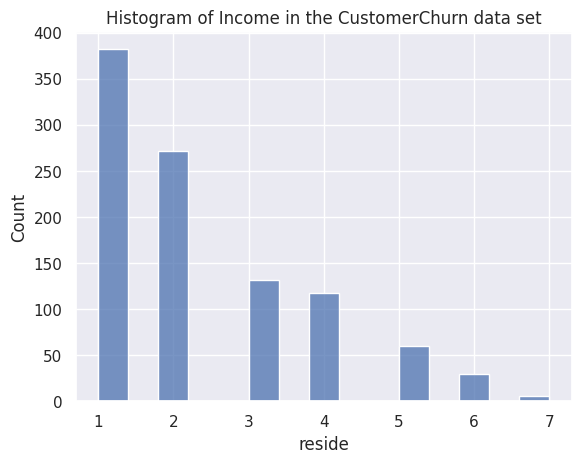

In [853]:
# Histogram of a numeric variable: reside
snsplot=sns.histplot(x='reside',data=customerchurn)
snsplot.set_title("Histogram of Income in the CustomerChurn data set")

Text(0.5, 1.0, 'Scatterplot of reside and Tenure')

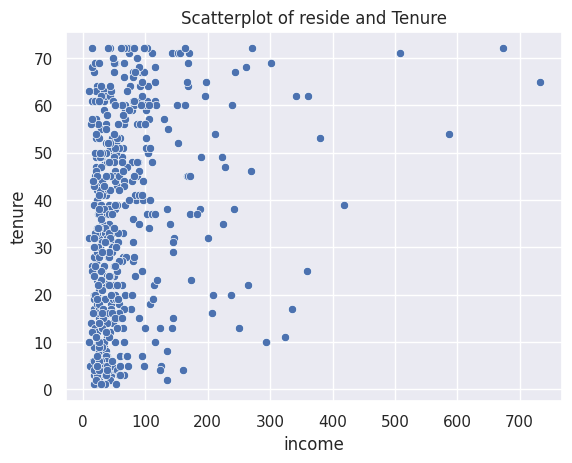

In [854]:
# scatter plot two numeric variables: reside and tenure
snsplot=sns.scatterplot(x='income', y='tenure',data=customerchurn)
snsplot.set_title("Scatterplot of reside and Tenure")

Text(0.5, 1.0, 'Scatterplot of reside and Tenure')

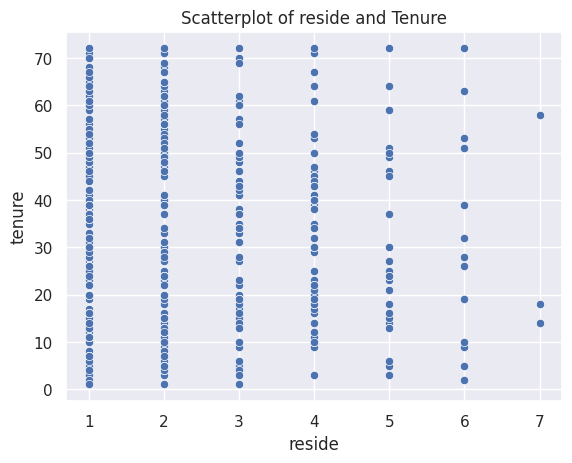

In [883]:
# scatter plot two numeric variables: reside and tenure
snsplot=sns.scatterplot(x='reside', y='tenure',data=customerchurn)
snsplot.set_title("Scatterplot of reside and Tenure")

Text(0.5, 1.0, 'Scatterplot of reside and Tenure')

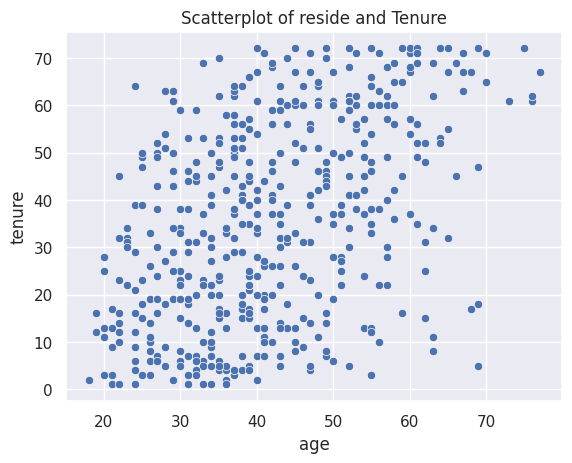

In [885]:
# scatter plot two numeric variables: reside and tenure
snsplot=sns.scatterplot(x='age', y='tenure',data=customerchurn)
snsplot.set_title("Scatterplot of reside and Tenure")

In [855]:
# Generate correlation coefficients of two numeric variables in a 2x2 matrix:
customerchurn[['income','tenure']].corr()

,income,tenure
income,1.000000,0.260311
tenure,0.260311,1.000000


In [886]:
customerchurn[['age','tenure']].corr()

,age,tenure
age,1.000000,0.475715
tenure,0.475715,1.000000


In [856]:
# Generate correlation coefficients of all numeric variables
customerchurn[['tenure','age','income','employ','reside','tollmon','equipmon','cardmon','wiremon']].corr()

,tenure,age,income,employ,reside,tollmon,equipmon,cardmon,wiremon
tenure,1.000000,0.475715,0.260311,0.520837,0.003392,0.183964,-0.060533,0.464380,0.122197
age,0.475715,1.000000,0.375201,0.667698,-0.219699,0.108035,-0.087599,0.357184,0.035937
income,0.260311,0.375201,1.000000,0.611087,-0.099252,0.169940,-0.035326,0.176103,0.098222
employ,0.520837,0.667698,0.611087,1.000000,-0.104103,0.189690,-0.159914,0.344947,0.017875
reside,0.003392,-0.219699,-0.099252,-0.104103,1.000000,0.076684,-0.009835,0.020076,0.048737
tollmon,0.183964,0.108035,0.169940,0.189690,0.076684,1.000000,0.070591,0.336954,0.462594
equipmon,-0.060533,-0.087599,-0.035326,-0.159914,-0.009835,0.070591,1.000000,-0.003648,0.534480
cardmon,0.464380,0.357184,0.176103,0.344947,0.020076,0.336954,-0.003648,1.000000,0.267844
wiremon,0.122197,0.035937,0.098222,0.017875,0.048737,0.462594,0.534480,0.267844,1.000000


Next, i need to look at all catgorical variables

In [857]:
#Display all catgorical data
customerchurn.select_dtypes(include=['category'])

,region,marital,ed,retire,gender,equip,multline,custcat,voice,pager,internet,churn
0,R2,Y,E4,N,N,N,N,C1,N,N,N,Y
1,R3,Y,E1,N,Y,N,N,C3,N,N,N,N
2,R2,Y,E1,N,N,N,N,C3,N,N,N,N
3,R3,Y,E2,N,Y,N,Y,C2,N,N,Y,Y
4,R3,Y,E4,N,N,N,Y,C3,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,R1,N,E3,N,N,N,N,C3,N,N,N,N
996,R1,Y,E2,N,N,N,N,C3,N,N,Y,N
997,R1,Y,E5,N,N,Y,Y,C4,Y,Y,Y,Y
998,R1,N,E5,N,Y,Y,N,C1,N,N,N,N


In [858]:
cate_churn.describe()

,region,marital,ed,retire,gender,equip,multline,custcat,voice,pager,internet,churn
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,2,5,2,2,2,2,4,2,2,2,2
top,R3,Y,E2,N,Y,N,N,C3,N,N,N,N
freq,346,504,290,960,502,630,544,290,704,734,660,742


Text(0.5, 1.0, 'countplot of Churn in the CustomerChurn data set')

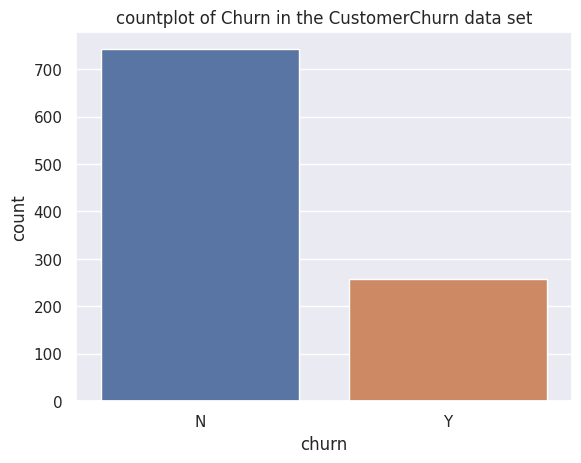

In [859]:
# Plot a categorical variable: churn
snsplot=sns.countplot(x='churn',data=customerchurn)
snsplot.set_title("countplot of Churn in the CustomerChurn data set")

Text(0.5, 1.0, 'countplot of Churn in the CustomerChurn data set')

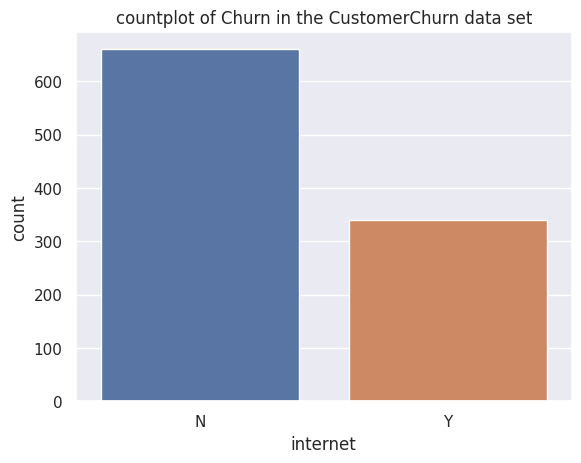

In [861]:
snsplot=sns.countplot(x='internet', data=customerchurn)
snsplot.set_title("countplot of internet in the CustomerChurn data set")

Relationship between numeric and categorical variables:

(0.0, 100.0)

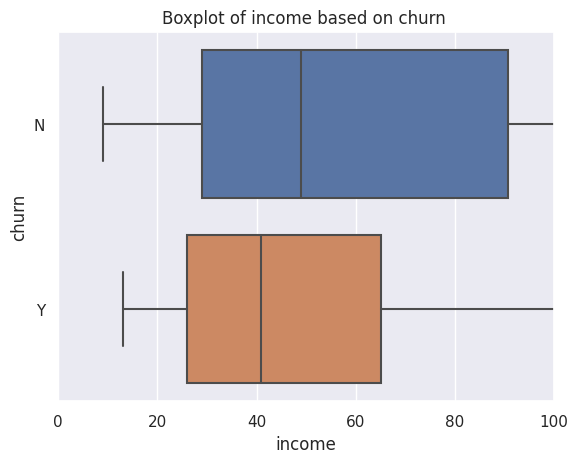

In [862]:
# Examine relationships between numeric and categorical variables: boxplot Income based on Churn
snsplot=sns.boxplot(x='income',y='churn',data=customerchurn)
snsplot.set_title("Boxplot of income based on churn ")
snsplot.set_xlim([0,100])

(0.0, 10.0)

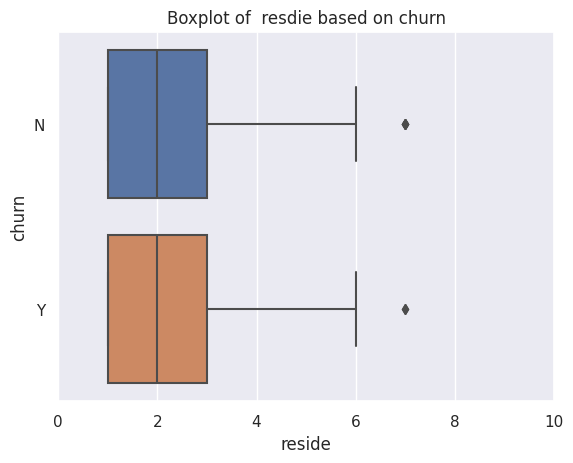

In [863]:
# Examine relationships between numeric and categorical variables: boxplot groups values of a numeric variable based on the values of a categorical variable.
snsplot = sns.boxplot(x='reside', y= 'churn', data = customerchurn)
snsplot.set_title("Boxplot of  resdie based on churn")
snsplot.set_xlim([0, 10])

Text(0.5, 1.0, 'Scatterplot of equipmon and  churn')

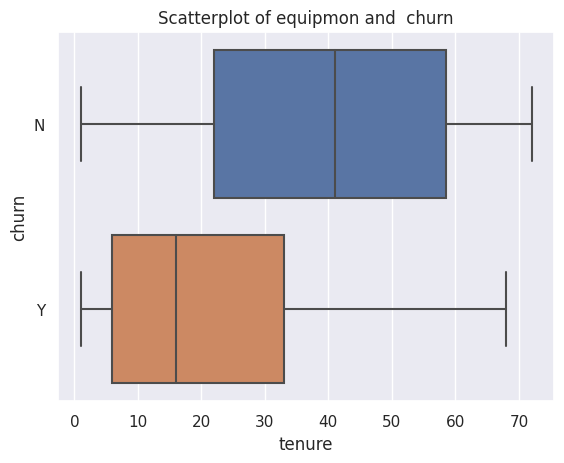

In [864]:
snsplot = sns.boxplot(x='tenure', y= 'churn', data=customerchurn)
snsplot.set_title("Scatterplot of equipmon and  churn")

**4. Decision Tree model prediction**

* Partition the data set for Decision Tree model

Because decision trees typically work with numerical data. Categorical variables, which represent categories or labels cannot be directly used as input, we will need to convert categorical variables into a binary (0 or 1) format, creating new binary columns for each category within a categorical variable.

In [865]:
# Create dummy variables
customerchurn = pd.get_dummies(customerchurn,columns = ['marital','retire','gender','equip','multline','voice','pager','internet'],drop_first=True)
customerchurn


,region,tenure,age,income,ed,employ,reside,tollmon,equipmon,cardmon,wiremon,custcat,churn,marital_Y,retire_Y,gender_Y,equip_Y,multline_Y,voice_Y,pager_Y,internet_Y
0,R2,13,44,64,E4,5,2,0.00,0.0,7.50,0.0,C1,Y,1,0,0,0,0,0,0,0
1,R3,68,52,116,E1,29,2,18.00,0.0,30.25,0.0,C3,N,1,0,1,0,0,0,0,0
2,R2,23,30,30,E1,2,4,0.00,0.0,0.00,0.0,C3,N,1,0,0,0,0,0,0,0
3,R3,45,22,19,E2,4,5,0.00,0.0,8.75,0.0,C2,Y,1,0,1,0,1,0,0,1
4,R3,45,59,166,E4,31,5,28.50,0.0,12.00,0.0,C3,N,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,R1,50,43,27,E3,4,1,45.25,0.0,52.75,0.0,C3,N,0,0,0,0,0,0,0,0
996,R1,34,52,106,E2,19,2,19.00,0.0,13.50,0.0,C3,N,1,0,0,0,0,0,0,1
997,R1,15,46,63,E5,1,2,16.50,42.5,0.00,33.1,C4,Y,1,0,0,1,1,1,1,1
998,R1,7,34,22,E5,5,1,0.00,25.6,0.00,0.0,C1,N,0,0,1,1,0,0,0,0


In [866]:
customerchurn = pd.get_dummies(customerchurn,columns = ['region','ed','custcat'])
customerchurn

,tenure,age,income,employ,reside,tollmon,equipmon,cardmon,wiremon,churn,marital_Y,retire_Y,gender_Y,equip_Y,multline_Y,voice_Y,pager_Y,internet_Y,region_R1,region_R2,region_R3,ed_E1,ed_E2,ed_E3,ed_E4,ed_E5,custcat_C1,custcat_C2,custcat_C3,custcat_C4
0,13,44,64,5,2,0.00,0.0,7.50,0.0,Y,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,68,52,116,29,2,18.00,0.0,30.25,0.0,N,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,23,30,30,2,4,0.00,0.0,0.00,0.0,N,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,45,22,19,4,5,0.00,0.0,8.75,0.0,Y,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
4,45,59,166,31,5,28.50,0.0,12.00,0.0,N,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,50,43,27,4,1,45.25,0.0,52.75,0.0,N,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
996,34,52,106,19,2,19.00,0.0,13.50,0.0,N,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
997,15,46,63,1,2,16.50,42.5,0.00,33.1,Y,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1
998,7,34,22,5,1,0.00,25.6,0.00,0.0,N,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0


We will count the % of customers in the dataset who have churned:

In [867]:
# Examine the porportion of target variable for data set
target = customerchurn['churn']
print(target.value_counts(normalize=True))

N    0.742
Y    0.258
Name: churn, dtype: float64


Approximately 26% of the customers in the dataset have churned. This means that we are dealing with an imbalanced classification problem. We will need to create a balanced training dataset before building the predictive model.

In [868]:
# Partition the data
predictors = customerchurn.drop(['churn'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(700, 29) (300, 29) (700,) (300,)


As mentioned above, the dataset is imbalanced, which means that a majority of values in the target variable belong to a single class. Most customers in the dataset did not churn - only 27% of them did.This class imbalance problem can lead to an underperforming machine learning model. Some algorithms that train on an imbalanced dataset always end up predicting the majority class. While a model like this will be highly accurate (in this case it will be correct 74% of the time), it is of no value to us since it is always predicting a single outcome.

We will use a technique called undersampling. This is a process that involves randomly selecting samples from the majority class and adding it to the training dataset. We are going to undersample the majority class until the number of data points are equal to that of the minority class.

In [869]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

In [870]:
# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['churn'] == 'N']
minority_df = combined_train_df[combined_train_df['churn'] == 'Y']

In [871]:
# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

In [872]:
# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

In [873]:
# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=5)


In [874]:
# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['churn'])
target_train = balanced_data['churn']

In [875]:
# Examine the porportion of target variable for train set
print(target_train.value_counts(normalize=True), target_train.shape)

N    0.5
Y    0.5
Name: churn, dtype: float64 (342,)


In [876]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

N    0.71
Y    0.29
Name: churn, dtype: float64


* Decision tree model

In [877]:
#Build a decision tree model on training data with max_depth = 3
model_DT = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
model_DT.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

[Text(0.5, 0.875, 'internet_Y <= 0.5\nentropy = 1.0\nsamples = 342\nvalue = [171, 171]\nclass = No'),
 Text(0.25, 0.625, 'employ <= 12.5\nentropy = 0.915\nsamples = 197\nvalue = [132, 65]\nclass = No'),
 Text(0.125, 0.375, 'tenure <= 7.5\nentropy = 0.999\nsamples = 125\nvalue = [65, 60]\nclass = No'),
 Text(0.0625, 0.125, 'entropy = 0.799\nsamples = 33\nvalue = [8, 25]\nclass = Yes'),
 Text(0.1875, 0.125, 'entropy = 0.958\nsamples = 92\nvalue = [57, 35]\nclass = No'),
 Text(0.375, 0.375, 'equipmon <= 46.925\nentropy = 0.364\nsamples = 72\nvalue = [67, 5]\nclass = No'),
 Text(0.3125, 0.125, 'entropy = 0.313\nsamples = 71\nvalue = [67, 4]\nclass = No'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.75, 0.625, 'tenure <= 11.5\nentropy = 0.84\nsamples = 145\nvalue = [39, 106]\nclass = Yes'),
 Text(0.625, 0.375, 'income <= 70.5\nentropy = 0.254\nsamples = 47\nvalue = [2, 45]\nclass = Yes'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 32\nvalue =

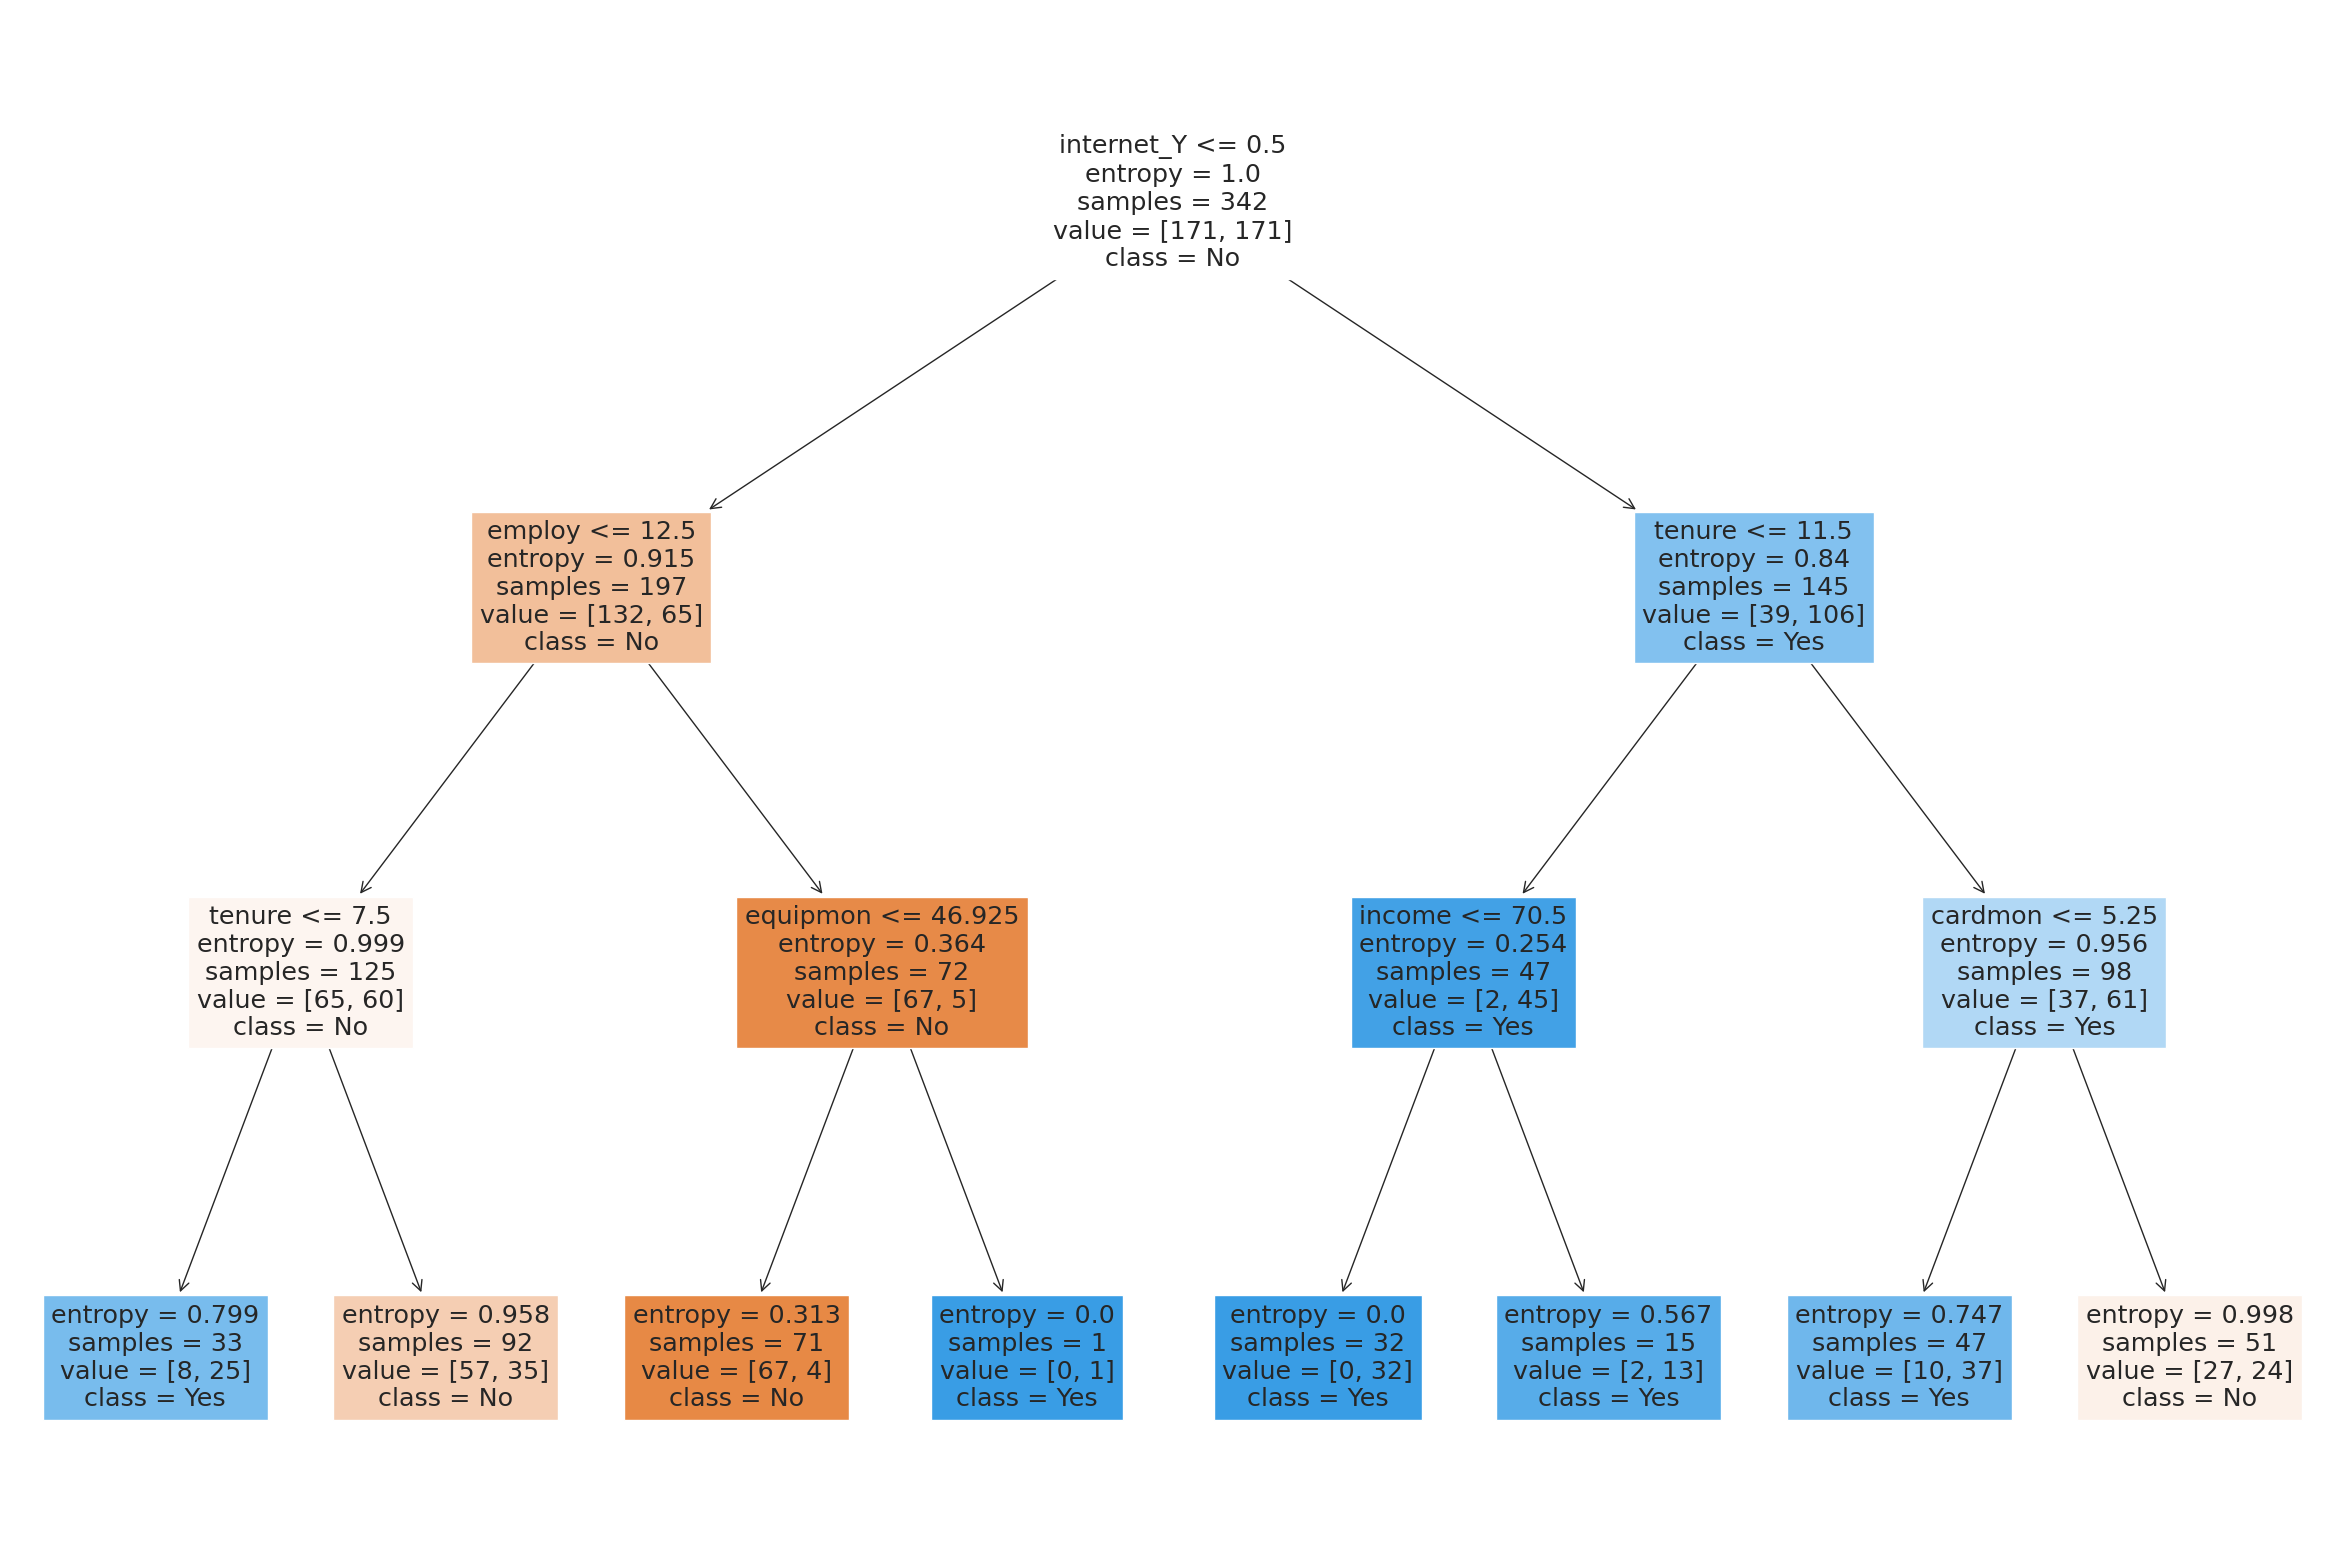

In [878]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model_DT,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

Internet is a variable that has the highest impact on the prediction. Internet is the predictor that first splits the tree. The decision tree selects the first predictor by entropy.

In [879]:
# Text version of decision tree
print(tree.export_text(model_DT, feature_names=list(customerchurn.columns)[1:]))

|--- internet_Y <= 0.50
|   |--- reside <= 12.50
|   |   |--- age <= 7.50
|   |   |   |--- class: Y
|   |   |--- age >  7.50
|   |   |   |--- class: N
|   |--- reside >  12.50
|   |   |--- cardmon <= 46.92
|   |   |   |--- class: N
|   |   |--- cardmon >  46.92
|   |   |   |--- class: Y
|--- internet_Y >  0.50
|   |--- age <= 11.50
|   |   |--- employ <= 70.50
|   |   |   |--- class: Y
|   |   |--- employ >  70.50
|   |   |   |--- class: Y
|   |--- age >  11.50
|   |   |--- wiremon <= 5.25
|   |   |   |--- class: Y
|   |   |--- wiremon >  5.25
|   |   |   |--- class: N



In [880]:
# Make predictions on testing data
prediction_on_test_DT = model_DT.predict(predictors_test)

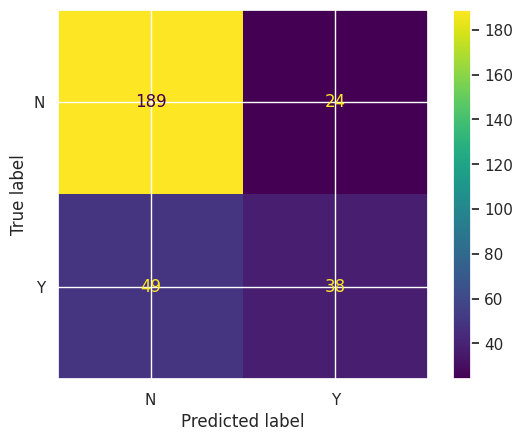

In [881]:
# Examine the evaluation results on testing data: confusion_matrix
cm_DT = confusion_matrix(target_test, prediction_on_test_DT)
ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=model_DT.classes_).plot()

**5. Customer Churn Prediction Model Evaluation**


In [882]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test_DT))

              precision    recall  f1-score   support

           N       0.79      0.89      0.84       213
           Y       0.61      0.44      0.51        87

    accuracy                           0.76       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.74      0.76      0.74       300



The decision tree model has better performance on the majority (churn = 'No') since it has higher precision (0.79), higher recall which is 0.89 and higher F1-score which is 0.84, than the minority ( churn = 'Yes') which are 0.61, 0.44 and 0.51 respectively.

**6. Conclusion**


Tools and techniques: python, decision tree model, pandas, Matplotlib and Seaborn, Scikit-Learn.

The overall performance of this model is average (accuracy = 0.76). I think businesses can still use my classifier to predict whether a customer is going
to be a churner or not. However, it would be better if they can capture more acutual churn cases data.
* While the model achieves a higher precision for class "N" (No churn), mean that it correctly identifies non-churn cases, its recall for class "Y" (Churn) is low. This means it misses a significant portion of actual churn cases.
* F1-Score: The F1-score for class "Y" is 0.51, which suggests a moderate balance between precision and recall. However, it could be improved to achieve a better balance between correctly identifying churn cases and minimizing false positives.

* Accuracy: The overall accuracy of 0.76 is relatively good, but accuracy alone may not provide a complete picture of model performance, especially when dealing with imbalanced datasets.

After performing data analysis on the data set, this is what we have incurred from data:
- Most customers who churn in the data set are individuals without dependents or living with family because
- Customers who stay longer for the business usually have higher income. Higher-income customers may be less likely to churn due to their financial commitment to the company's services.
- Among all customers, there are 26% who are churners.
- there is a positive realtionship between age and tenure which indicate that the older customer dont have a tendency to switch company.
- The length of time a customer has been with the company is often a strong predictor of churn. Longer-tenured customers are typically less likely to churn.
-Customers who spend more on equipment usage may be more engaged with the company's services. Higher "equipmon" values could indicate that customers are actively using the equipment, which may be associated with a lower likelihood of churn.

Address business question: Some shared traits that we observe among customer who churn are: lower income, single (or fewer people live in household), younger age, low equipmon values.

Recommendations:
- Implement targeted retention programs for customers with lower income levels. Consider offering discounts or special offers to make services more affordable for this segment.
- Create more atractive package for single subcriber. ( cost, features)
- New promotion for first time signup.
- Focus on strategies to enhance the engagement of long-term customers through through loyalty programs or exclusive benefits.
-Engage younger customers with innovative and relevant services, promotions, or content that aligns with their preferences.
- Maintain open and responsive communication channels with customers. Gain feedbacks and address their concerns and inquiries promptly to enhance their overall experience.



In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Assignment_1.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/IS470_lab04.ipynb to html
[NbConvertApp] Writing 1158686 bytes to /content/drive/MyDrive/Colab Notebooks/IS470_lab04.html
